# Analyze Gromacs gro files

## Import packages

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from upsetplot import UpSet  # https://upsetplot.readthedocs.io/en/stable/index.html
import yaml

# Update font size for graphics
plt.rcParams.update({'font.size': 20})

## Load data

In [2]:
gro_df = pd.read_csv("../data/gromacs_gro_files_info.tsv", sep="\t")
print(gro_df.shape)
gro_df.head()

(9005, 9)


,dataset_origin,dataset_id,atom_number,has_protein,has_nucleic,has_lipid,has_water_ion,has_glucid,filename
0,osf,6fuqs,3468,True,False,False,False,False,Trajectories/4_su.gro
1,osf,6fuqs,3468,True,False,False,False,False,Trajectories/6_su.gro
2,osf,6fuqs,3468,True,False,False,False,False,Trajectories/3_su.gro
3,osf,6fuqs,3468,True,False,False,False,False,Trajectories/8_su.gro
4,osf,6fuqs,3468,True,False,False,False,False,Trajectories/2_su.gro


## GRO files

### Proteins, lipids and nucleic acids

In [3]:
print(f"Total number of gro files analyzed: {gro_df.shape[0]}")
print(f"Number of gro files with protein: {gro_df.query('has_protein==True').shape[0]}")
print(f"Number of gro files with lipid: {gro_df.query('has_lipid==True').shape[0]}")
print(f"Number of gro files with nucleic acid: {gro_df.query('has_nucleic==True').shape[0]}")
print(f"Number of gro files with protein and lipid: {gro_df.query('has_protein==True').query('has_lipid==True').shape[0]}")
print(f"Number of gro files with protein and nucleic acid: {gro_df.query('has_protein==True').query('has_nucleic==True').shape[0]}")
print(f"Number of gro files with lipid and nucleic acid: {gro_df.query('has_lipid==True').query('has_nucleic==True').shape[0]}")

Total number of gro files analyzed: 9005
Number of gro files with protein: 4259
Number of gro files with lipid: 4502
Number of gro files with nucleic acid: 1216
Number of gro files with protein and lipid: 2728
Number of gro files with protein and nucleic acid: 91
Number of gro files with lipid and nucleic acid: 0


In [4]:
gro_df.query('has_lipid==False').query('has_protein==False').query('has_nucleic==False')

,dataset_origin,dataset_id,atom_number,has_protein,has_nucleic,has_lipid,has_water_ion,has_glucid,filename
74,osf,gwem8,780,False,False,False,False,False,non-polar oil cluster (30 octane molecules).gro
75,osf,gwem8,18905,False,False,False,False,False,kerogen slab.gro
76,osf,gwem8,8100,False,False,False,False,False,calcite (104).gro
96,osf,yfstw,30,False,False,False,False,False,gros/LIP2.gro
97,osf,yfstw,12,False,False,False,False,False,gros/C55P.gro
...,...,...,...,...,...,...,...,...,...
8999,figshare,2527738,82,False,False,False,False,False,hpo0.gro
9000,figshare,2527738,80,False,False,False,False,False,hpo2.gro
9002,figshare,11569452,142,False,False,False,False,False,md_files/n-cage/conf.gro
9003,figshare,11569452,5036,False,False,False,False,False,md_files/c-cage/solvated.gro


## Système size

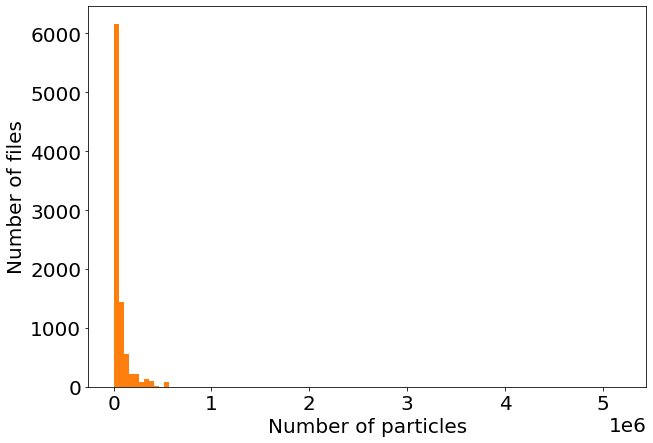

In [5]:
plt.figure(figsize=(10,7))
plt.rcParams.update({"font.size": 20})
plt.hist(gro_df["atom_number"],
         bins=100,
         color="tab:orange")
plt.xlabel("Number of particles")
plt.ylabel("Number of files")
plt.savefig("gromacs_gro_system_size_distribution.png", dpi=300, bbox_inches="tight")
plt.savefig("gromacs_gro_system_size_distribution.svg", bbox_inches="tight")

KeyError: 'k_particules'

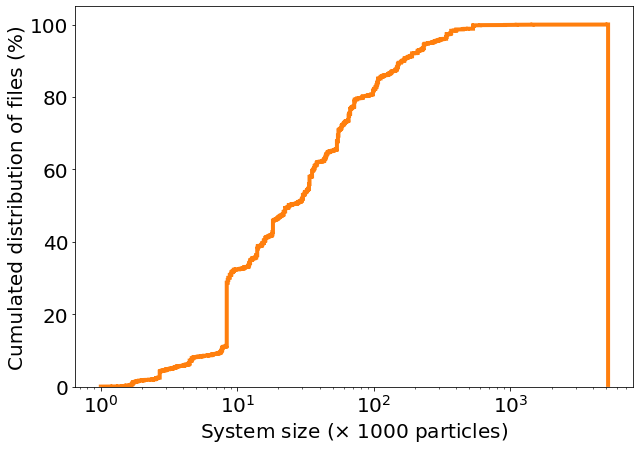

In [6]:
# Convert system size to k-particules (1000) 
gro_df["k_particles"] = gro_df["atom_number"] / 1000

logbins = np.geomspace(gro_df["k_particles"].min()+1, gro_df["k_particles"].max(), 1_000)

plt.rcParams.update({"font.size": 20})
fig, ax = plt.subplots(figsize=(10,7))
values, bins, _ = ax.hist(
    gro_df["k_particles"], 
    bins=logbins,
    color="tab:orange", linewidth=4,
    histtype="step", cumulative=True, density=True
)
ax.set_xlabel(r"System size ($\times$ 1000 particles)")
ax.set_ylabel("Cumulated distribution of files (%)")
ax.set_yticks(np.arange(0, 1.1, 0.2), [f"{value:.0f}" for value in np.arange(0, 1.1, 0.2)*100])
ax.set_xscale("log")
ax.set_xlim(1, gro_df["k_particules"].max())
plt.savefig("gromacs_gro_system_size_cumulated_distribution.png", dpi=300, bbox_inches="tight")
plt.savefig("gromacs_gro_system_size_cumulated_distribution.svg", bbox_inches="tight")

## Upset plot

Use of the library [upsetplot](https://upsetplot.readthedocs.io/en/stable/index.html)

In [ ]:
df_upset = pd.pivot_table(gro_df, 
                          index=["has_protein", "has_lipid", "has_nucleic", "has_water_ion", "has_glucid"], 
                          values=["filename"], 
                          aggfunc=len)
df_upset

In [ ]:
# Convert pivot dataframe to Pandas Series with multi-index
sr_upset = pd.Series(index=df_upset.index, data=df_upset.values.flatten(), name="value")
sr_upset

In [ ]:
_ = UpSet(sr_upset, show_counts=True, element_size=40).plot()